In [ ]:
Run in terminal
pip install -r requirements.txt
jupyter lab

In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../src'))


In [9]:
import sys
import os
sys.path.append("..")  # if you're in /notebooks/ directory

from Forecasting import generate_liquidity_data

generate_liquidity_data('../data/liquidity_data.csv')

✅ Sample data saved to ../data/liquidity_data.csv


In [10]:
from preprocessing import load_data
df = load_data('../data/liquidity_data.csv')
df.head()


,liquidity,event,liquidity_diff,rolling_mean
date,,,,
2020-01-07,103.940091,0,1.629213,101.919493
2020-01-08,104.757525,0,0.817435,102.528181
2020-01-09,104.338051,0,-0.419474,103.089552
2020-01-10,104.930611,0,0.592560,103.635906
2020-01-11,104.517193,0,-0.413418,103.898481


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.local/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


FileNotFoundError: [Errno 2] No such file or directory: 'visuals/sarima_forecast.png'

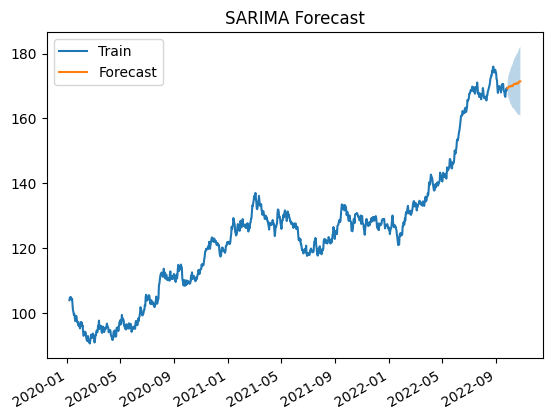

In [11]:
# Train SARIMA
from src.sarima_model import train_sarima, forecast_plot
model = train_sarima(df['liquidity'])
forecast_plot(df['liquidity'], model)


FileNotFoundError: [Errno 2] No such file or directory: 'visuals/xgb_forecast.png'

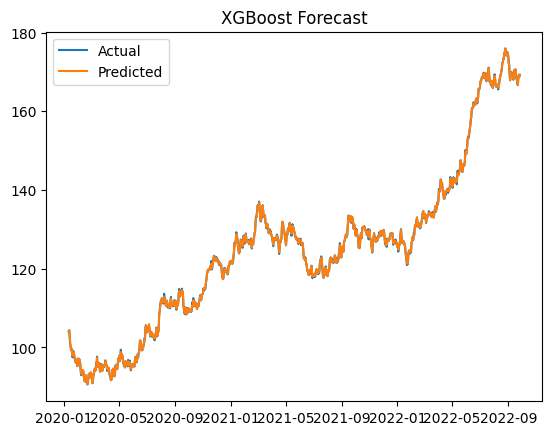

In [12]:
# Train XGBoost
from src.xgboost_model import prepare_features, train_xgb, plot_xgb_predictions
df = prepare_features(df)
model = train_xgb(df)
plot_xgb_predictions(df, model)


                            OLS Regression Results                            
Dep. Variable:              liquidity   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     366.6
Date:                Mon, 21 Apr 2025   Prob (F-statistic):          9.19e-120
Time:                        07:01:18   Log-Likelihood:                -4118.2
No. Observations:                 989   AIC:                             8242.
Df Residuals:                     986   BIC:                             8257.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
post         7.838e+13   1.81e+14      0.434      

FileNotFoundError: [Errno 2] No such file or directory: 'visuals/did_effect.png'

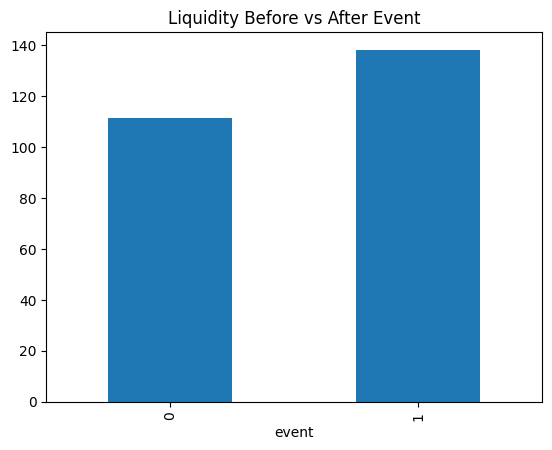

In [14]:
from src.casual_inference import run_did, plot_did_effect
run_did(df)
plot_did_effect(df)
